**Análisis de la performance de los atletas olímpicos a lo largo de la historia.**

**Introducción**

El propósito de este estudio es analizar la obtención de medallas por parte de los atletas olímpicos a través de la historia para encontrar relaciones entre las performances y otras variables que nos lleve a predecir si un atelta de élite obtendrá una medalla olímpica y cuál sería.

Según Wikipedia, se otorga una medalla Olímpica a los competidores exitosos en uno de los Juegos Olímpicos. Hay tres clases de medallas: oro, otorgada al ganador; plata, otorgada al subcampeón; y bronce, otorgado al tercer lugar. La concesión de premios se detalla en los protocolos Olímpicos.

Las medallas totales ganadas se utilizan para clasificar a las naciones competidoras en las tablas de medallas, estas pueden compilarse para una disciplina específica, para una Olimpiada en particular o para todo el tiempo. Estos totales siempre suman las obtenciones por eventos en lugar de las medallas reales. Una victoria en un evento por equipos equivale a un solo oro para tales clasificaciones, aunque cada miembro del equipo recibe una medalla física.

Un concepto importante es el de Comité Olímpico Nacional (NOC, por sus siglas en inglés), según Wikipedia es la sede nacional de cada país encargada de fomentar y proteger al Movimiento Olímpico en sus respectivos países. Estos comités también promueven el desarrollo de los atletas y preparan a los entrenadores y oficiales en un nivel nacional.

La estrategia del trabajo será segmentar el Dataset por distintos criterios para encontrar relaciones fundamentadas. Se utilizarán las librerías de Numpy, Pandas, Matplotlib y Seaborn para trabajar y visualizar las hipótesis. Posteriormente se utilizará la librería Scikit-learn para la construcción del modelo de aprendizaje automático.

En función de las necesidades se agregarán otras librerías.

**Objetivo**

Crear un modelo de clasificación que permita predecir si un atleta de elite obtendrá una medalla y cuál sería (Oro, Plata o Bronce)

**Contexto Comercial**

Los Comités Olímpicos Nacionales hacen grandes esfuerzos económicos y logísticos para apoyar y acompañar a los atletas de elite en su camino a la máxima competencia deportiva: las Olimpiadas. Sería importante predecir si un atleta, dadas ciertas caracterísiticas, podría ser medallista olímpico de manera de reforzar y redoblar el apoyo, o identificar en qué momento el atleta está en su mejor estado o situación para ser aspirante a una presea.

A los sponsors, gobiernos y demás empresas que colaboran en la carrera deportiva de los atletas también les interesa conocer si un atleta fichado para dar apoyo es un potencial medallista medallista.

Adicionalmente los atletas hacen grandes esfuerzos económicos, mantienen largas jornadas de entrenamiento diario en pos del objetivo olímpico puesto a disposición cada 4 años; sin olvidar las renuncias sociales, familiares, académicas, laborales que muchos de ellos deben hacer en la búsqueda del ansiado objetivo olímpico. Si hay condiciones que hagan propensa la obtención de la presea y esa condición pudiera ser conocida, elegida y puesta en práctica por el atleta sería un as bajo la manga para trabajar en ello en la búqueda del logro olímpico.

**Problema Comercial**

Con este análisis se intentará predecir si un atleta de elite podría ser medallista olímpico dadas determinadas características. Y encontrar las variables o condiciones que favorezcan la consecución de una medalla.

**Hipótesis**

Se espera encontrar respuesta a las siguientes preguntas:

¿Existe alguna relación entre la cantidad de medallas obtenidas por los atletas y la edad?

¿El peso y la altura de los atletas puede ser determinante para predecir una performance exitosa?

¿El NOC al cual representan los atletas puede ser determinante a la hora de conseguir una presea?

**Contexto analítico**

Se trabajará con el dataset denominado athlete_events.csv.

Este es un conjunto de datos históricos sobre los Juegos Olímpicos modernos, incluidos todos los Juegos desde Atenas 1896 hasta Río 2016 (1)

El archivo atlhets_events.csv contiene 271116 filas y 15 columnas. Cada fila corresponde a un atleta individual compitiendo en un evento olímpico individual. Las columnas son:

ID - Número único para cada atleta

Nombre - Nombre del atleta

Sexo - M o F

Edad - Años del participante

Altura - En centímetros

Peso - En kilogramos

Equipo - Nombre del equipo (País)

NOC - Código de 3 letras del Comité Olímpico Nacional al que representa el atleta

Juegos - Año y Temporada (Invierno o Verano)

Año - Año de la Olimpiada

Temporada - Invierno o Verano

Ciudad - Ciudad anfitriona

Deporte - Deporte

Evento - Competencia

Medalla : oro, plata, bronce o NA.

*(1) kaggle. Gabriel Preda*

**Hipótesis**

Se espera encontrar respuesta a las siguientes preguntas:

¿Existe alguna relación entre la cantidad de medallas obtenidas por los atletas y la edad?

¿El peso y la altura de los atletas puede ser determinante para predecir una performance exitosa?

¿El NOC al cual representan los atletas puede ser determinante a la hora de conseguir una presea?

**Segmentación del archivo en 2 subconjuntos en función del Sexo**

En los primeros juegos, celebrados en Atenas en 1896, las mujeres estaban totalmente ausentes y, en los siguientes, en 1900, su representación sería el 2% del total de los atletas, participando de aquellas disciplinas que eran consideradas acordes a la naturaleza femenina, como golf y tenis.

En la antigüedad, el deporte serviría para reforzar la división sexual del trabajo y que ésta se entienda como el estado natural de las cosas. Tomó más de 100 años (114 para ser exactos) para que la participación fuera "casi" igualitaria: los Juegos de Londres de 2012 se llamarían los “Juegos de las Mujeres” por el récord de participación femenina y por haber sido la primera vez que las mujeres compitieron en todas las categorías.

Fuente: http://www.juegosolimpicosygenero.com/

Dada esta diferencia en la participación histórica es que se ha segmentado el análisis en función del género de los ateltas, buscando responder las preguntas para ambos conjuntos.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from bokeh.io import show, output_file
from bokeh.plotting import figure
from bokeh.models import Range1d
pd.set_option ('display.notebook_repr_html', True)
pd.set_option ('display.max_columns', 10)
pd.set_option ('display.max_rows', 10)
%matplotlib inline
import seaborn as sb
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import sklearn 
from scipy.stats import norm
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, RobustScaler, StandardScaler
mpl.rcParams['figure.dpi'] = 400
import graphviz 
from google.colab import drive
import os 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics 
sns.set_style('whitegrid')
drive.mount ('/content/gdrive') 
from statistics import mode
import plotly.express as px
import plotly.graph_objects as go
from matplotlib.gridspec import GridSpec 
!pip install -U ridgeplot
from ridgeplot import ridgeplot

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%cd '//content/gdrive/MyDrive/Coderhouse/Data Science/Entrega 1 - Selección de potenciales Datasets e importe con la librería Pandas/120 años de historia olímpica'

/content/gdrive/MyDrive/Coderhouse/Data Science/Entrega 1 - Selección de potenciales Datasets e importe con la librería Pandas/120 años de historia olímpica


**EDA**

In [ ]:
!head -10 athlete_events.csv

"ID","Name","Sex","Age","Height","Weight","Team","NOC","Games","Year","Season","City","Sport","Event","Medal"
"1","A Dijiang","M",24,180,80,"China","CHN","1992 Summer",1992,"Summer","Barcelona","Basketball","Basketball Men's Basketball",NA
"2","A Lamusi","M",23,170,60,"China","CHN","2012 Summer",2012,"Summer","London","Judo","Judo Men's Extra-Lightweight",NA
"3","Gunnar Nielsen Aaby","M",24,NA,NA,"Denmark","DEN","1920 Summer",1920,"Summer","Antwerpen","Football","Football Men's Football",NA
"4","Edgar Lindenau Aabye","M",34,NA,NA,"Denmark/Sweden","DEN","1900 Summer",1900,"Summer","Paris","Tug-Of-War","Tug-Of-War Men's Tug-Of-War","Gold"
"5","Christine Jacoba Aaftink","F",21,185,82,"Netherlands","NED","1988 Winter",1988,"Winter","Calgary","Speed Skating","Speed Skating Women's 500 metres",NA
"5","Christine Jacoba Aaftink","F",21,185,82,"Netherlands","NED","1988 Winter",1988,"Winter","Calgary","Speed Skating","Speed Skating Women's 1,000 metres",NA
"5","Christine Jacoba Aaftink","F",25,1

In [ ]:
df_atletas= pd.read_csv('athlete_events.csv',sep=',')
df_atletas[['Name','Sex', 'Age']].head()

Name Sex   Age
0                 A Dijiang   M  24.0
1                  A Lamusi   M  23.0
2       Gunnar Nielsen Aaby   M  24.0
3      Edgar Lindenau Aabye   M  34.0
4  Christine Jacoba Aaftink   F  21.0

In [ ]:
df_atletas.shape

(271116, 15)

División del dataframe original en 2 subconjuntos en función del género de los atletas

In [ ]:
df_M=df_atletas[df_atletas.Sex == "F" ] # dataframe para atletas Mujeres
df_H=df_atletas[df_atletas.Sex == "M" ] # dataframe para atletas Hombres

**MUJERES EN LOS JUEGOS OLÍMPICOS**

In [ ]:
df_M.shape

(74522, 15)

In [ ]:
df_M.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [ ]:
print(df_M.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74522 entries, 4 to 271110
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      74522 non-null  int64  
 1   Name    74522 non-null  object 
 2   Sex     74522 non-null  object 
 3   Age     74098 non-null  float64
 4   Height  67378 non-null  float64
 5   Weight  66771 non-null  float64
 6   Team    74522 non-null  object 
 7   NOC     74522 non-null  object 
 8   Games   74522 non-null  object 
 9   Year    74522 non-null  int64  
 10  Season  74522 non-null  object 
 11  City    74522 non-null  object 
 12  Sport   74522 non-null  object 
 13  Event   74522 non-null  object 
 14  Medal   11253 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 9.1+ MB
None


**1 - LIMPIEZA DE DATOS**

Vemos que las columnas "Height", "Weight" y "Age" tienen valores nulos. Luego analizaremos la conveniencia de reemplazarlos por otro valor. para la columna "Medal" es factible de tener valores nulos en la mayoría de los registros dados que muestra los atletas que no obtuvieron medallas.

**1) En la columna "Medal" se reemplazan los valores NA con la expresión "sin medalla"**

In [ ]:
x = df_M["Medal"]

df_M["Medal"].fillna('sin medalla', inplace = True)

df_M["Medal"].replace([0], 'sin medalla')

4         sin medalla
5         sin medalla
6         sin medalla
7         sin medalla
8         sin medalla
             ...     
271080         Bronze
271099    sin medalla
271102         Bronze
271103         Silver
271110    sin medalla
Name: Medal, Length: 74522, dtype: object

 **2)  Se completan los valores nulos de "Age", "Height" y "Weight" con el método "ffill"**

In [ ]:
# Creación de nuevo dataframe
df_M_1=df_M.fillna(axis = 0, method = "ffill") # método "ffill"

In [ ]:
df_M_1

ID                                 Name Sex   Age  Height  ...  \
4            5             Christine Jacoba Aaftink   F  21.0   185.0  ...   
5            5             Christine Jacoba Aaftink   F  21.0   185.0  ...   
6            5             Christine Jacoba Aaftink   F  25.0   185.0  ...   
7            5             Christine Jacoba Aaftink   F  25.0   185.0  ...   
8            5             Christine Jacoba Aaftink   F  27.0   185.0  ...   
...        ...                                  ...  ..   ...     ...  ...   
271080  135553  Galina Ivanovna Zybina (-Fyodorova)   F  33.0   168.0  ...   
271099  135560                    Stavroula Zygouri   F  36.0   171.0  ...   
271102  135563            Olesya Nikolayevna Zykina   F  19.0   171.0  ...   
271103  135563            Olesya Nikolayevna Zykina   F  23.0   171.0  ...   
271110  135568               Olga Igorevna Zyuzkova   F  33.0   171.0  ...   

        Season            City          Sport  \
4       Winter         Calgary  Speed Skating   
5       Winter         Calgary  Speed Skating   
6       Winter     Albertville  Speed Skating   
7       Winter     Albertville  Speed Skating   
8       Winter     Lillehammer  Speed Skating   
...        ...             ...            ...   
271080  Summer           Tokyo      Athletics   
271099  Summer          Athina      Wrestling   
271102  Summer          Sydney      Athletics   
271103  Summer          Athina      Athletics   
271110  Summer  Rio de Janeiro     Basketball   

                                            Event        Medal  
4                Speed Skating Women's 500 metres  sin medalla  
5              Speed Skating Women's 1,000 metres  sin medalla  
6                Speed Skating Women's 500 metres  sin medalla  
7              Speed Skating Women's 1,000 metres  sin medalla  
8                Speed Skating Women's 500 metres  sin medalla  
...                                           ...          ...  
271080                 Athletics Women's Shot Put       Bronze  
271099  Wrestling Women's Middleweight, Freestyle  sin medalla  
271102     Athletics Women's 4 x 400 metres Relay       Bronze  
271103     Athletics Women's 4 x 400 metres Relay       Silver  
271110              Basketball Women's Basketball  sin medalla  

[74522 rows x 15 columns]

In [ ]:
df_M_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74522 entries, 4 to 271110
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      74522 non-null  int64  
 1   Name    74522 non-null  object 
 2   Sex     74522 non-null  object 
 3   Age     74522 non-null  float64
 4   Height  74522 non-null  float64
 5   Weight  74522 non-null  float64
 6   Team    74522 non-null  object 
 7   NOC     74522 non-null  object 
 8   Games   74522 non-null  object 
 9   Year    74522 non-null  int64  
 10  Season  74522 non-null  object 
 11  City    74522 non-null  object 
 12  Sport   74522 non-null  object 
 13  Event   74522 non-null  object 
 14  Medal   74522 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 9.1+ MB


**3) Gestión de duplicados**

In [ ]:
print(df_M_1.shape)
df_M_1= df_M_1.drop_duplicates()
print(df_M_1.shape) # se registran duplicados

(74522, 15)
(74378, 15)


**4) Gestión de valores atípicos**

In [ ]:
# Búsqueda de valores atípicos
def find_outliers_IQR(df_M_1,feature):
   q1=df_M_1[feature].quantile(0.25)
   q3=df_M_1[feature].quantile(0.75)
   IQR=q3-q1
   outliers = df_M_1[((df_M_1[feature]<(q1-1.5*IQR)) | (df_M_1[feature]>(q3+1.5*IQR)))]
   return outliers

a - **Atípicos de Edad** *texto en cursiva*: Visualizamos la distribución de edades de todas las atletas que participaron de una olimpiada

*I  Análisis General*

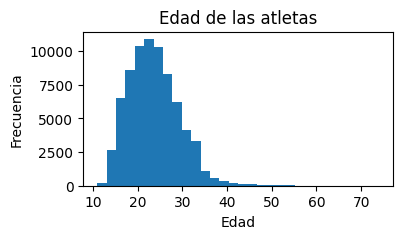

In [ ]:
mpl.style.use('default')

fig, ax = plt.subplots(figsize=(4,2))
ax.hist(x= df_M_1.Age, bins=30, density=False, orientation='vertical')
ax.set_xlabel('Edad')
ax.set_ylabel('Frecuencia')
ax.set_title('Edad de las atletas')

plt.show()

In [ ]:
df_M_1.Age.describe() # Valores Estadísticos

count    74378.000000
mean        23.699642
std          5.692970
min         11.000000
25%         20.000000
50%         23.000000
75%         27.000000
max         74.000000
Name: Age, dtype: float64

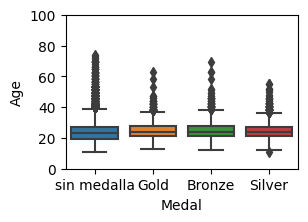

In [ ]:
# Valores Atípicos de Edad
var = 'Age'
data = pd.concat([df_M_1['Medal'], df_M_1[var]], axis=1)
f, ax = plt.subplots(figsize=(3, 2))
fig = sns.boxplot(x="Medal", y=var, data=data)
fig.axis(ymin=0, ymax=100);

🔔 **Vemos que la "Edad" muestra valores atípicos en todas las categorías, en la mayoría de los casos hacia arriba**

*II Análisis por Deporte*

Se analizará la distribución de edades por deporte para verificar si los valores atípicos corresponden a deportes que, por sus características, permiten la competencia de personas mayores o menores.

In [ ]:
edad = {edad: np.array(df_M_1['Age']) for edad, df_M_1 in df_M_1.groupby('Sport')}

In [ ]:
fig = ridgeplot(samples=edad.values(),bandwidth = 4, colorscale="magma", colormode='index', labels = edad.keys(), coloralpha =.5)
fig.update_layout(title = 'Distribución de edades por deporte', 
                  height=1100,
                  width=750,
                 yaxis_title="Deporte",
                 xaxis_title="Edad")
fig.show()

🔔 **Vemos que las disciplinas "competición de arte", "tiro al arco", "equitación", "remo", "tiro", y " tenis de mesa" presentan distribuciones donde se evidencian edadades superiores de participación.** 

**Haciendo un poco de historia, según Wikipedia "El británico John Copley, ganador de una medalla de plata en 1948 en la categoría de grabados y aguafuertes (competición de arte), tenía 73 años de edad al ganarla, lo que lo convierte en el medallista olímpico más mayor en la historia. El medallista olímpico más mayor fuera de las competiciones artísticas es el tirador sueco Oscar Swahn, que ganó su última medalla a la edad de 72." Lo cual es coherente con el análisis realizado.**

**Por otro lado, en las disciplinas "buceo", patinaje artísitico", "gimnasia" y "natación" las atletas parecen inicarse en edades menores.**

b - **Atípicos de Peso**: Visualizamos la distribución de peso de todas las atletas que participaron de una olimpiada

*I  Análisis General*

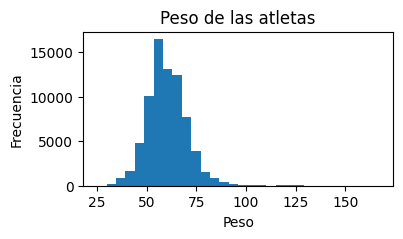

In [ ]:
mpl.style.use('default')

fig, ax = plt.subplots(figsize=(4,2))
ax.hist(x= df_M_1.Weight, bins=30, density=False, orientation='vertical')
ax.set_xlabel('Peso')
ax.set_ylabel('Frecuencia')
ax.set_title('Peso de las atletas')

plt.show()

In [ ]:
df_M_1.Weight.describe() # Valores Estadísticos

count    74378.000000
mean        60.165546
std         10.216141
min         25.000000
25%         54.000000
50%         60.000000
75%         65.000000
max        167.000000
Name: Weight, dtype: float64

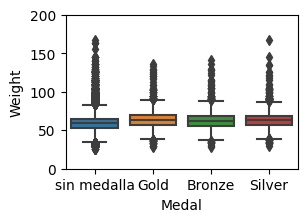

In [ ]:
# Valores Atípicos de Peso
var = 'Weight'
data = pd.concat([df_M_1['Medal'], df_M_1[var]], axis=1)
f, ax = plt.subplots(figsize=(3, 2))
fig = sns.boxplot(x="Medal", y=var, data=data)
fig.axis(ymin=0, ymax=200);

🔔 **Vemos que el "Peso" muestra valores atípicos en todas las categorías, tanto arriba commo abajo de los valores típicos**

*II Análisis por Deporte*

Se analizará la distribución de pesos por deporte para verificar si los valores atípicos corresponden a deportes que, por sus características, requieren o se ven favorecidos por contexturas mas robustas o mas delgadas.

In [ ]:
peso = {peso: np.array(df_M_1['Weight']) for peso, df_M_1 in df_M_1.groupby('Sport')}

In [ ]:
fig = ridgeplot(samples=peso.values(),bandwidth = 4, colorscale="magma", colormode='index', labels = edad.keys(), coloralpha =.5)
fig.update_layout(title = 'Distribución de pesos por deporte', 
                  height=1100,
                  width=750,
                 yaxis_title="Deporte",
                 xaxis_title="Peso")
fig.show()

🔔 **Vemos que las disciplinas "esquí", "atletismo", "gimnasia", "judo", y "levantamiento de pesas" presentan distribuciones donde se evidencian pesos  superiores. Por otro lado "gimnasia rítmica" y "gimnasia" tienen distribuciones que comienzan con pesos mas bajos de las atletas**

c - **Atípicos de Altura**: Visualizamos la distribución de altura de todas las atletas que participaron de una olimpiada

*I  Análisis General*

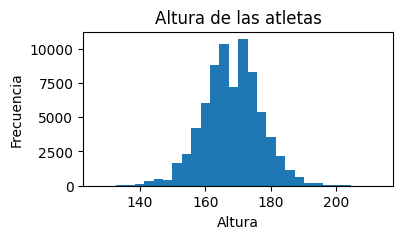

In [ ]:
mpl.style.use('default')

fig, ax = plt.subplots(figsize=(4,2))
ax.hist(x= df_M_1.Height, bins=30, density=False, orientation='vertical')
ax.set_xlabel('Altura')
ax.set_ylabel('Frecuencia')
ax.set_title('Altura de las atletas')

plt.show()

In [ ]:
df_M_1.Height.describe() # Valores Estadísticos

count    74378.000000
mean       167.948264
std          8.760270
min        127.000000
25%        162.000000
50%        168.000000
75%        173.000000
max        213.000000
Name: Height, dtype: float64

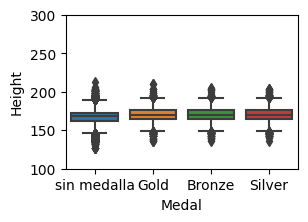

In [ ]:
# Valores Atípicos de altura
var = 'Height'
data = pd.concat([df_M_1['Medal'], df_M_1[var]], axis=1)
f, ax = plt.subplots(figsize=(3, 2))
fig = sns.boxplot(x="Medal", y=var, data=data)
fig.axis(ymin=100, ymax=300);

🔔 **Vemos que la "Altura" muestra valores atípicos en todas las categorías, tanto arriba commo abajo de los valores típicos**

*II Análisis por Deporte*

Se analizará la distribución de alturas por deporte para verificar si los valores atípicos corresponden a deportes que, por sus características,  requieren o se ven favorecidos por estaturas mayores o menores.

In [ ]:
altura = {altura: np.array(df_M_1['Height']) for altura, df_M_1 in df_M_1.groupby('Sport')}

In [ ]:
fig = ridgeplot(samples=altura.values(),bandwidth = 4, colorscale="magma", colormode='index', labels = altura.keys(), coloralpha =.5)
fig.update_layout(title = 'Distribución de alturas por deporte', 
                  height=1100,
                  width=750,
                 yaxis_title="Deporte",
                 xaxis_title="Altura")
fig.show()

🔔 **Vemos que las disciplinas "básquet", y "voley" presentan distribuciones donde se evidencian alturas superiores. Por otro lado nuevamente "gimnasia rítmica" y "gimnasia" tienen distribuciones que comienzan con alturas menores  de las atletas**

📣 **Dado que los valores atípicos se presentan en deportes donde el peso y la altura suelen ser determinantes para su práctica y la edad toma valores atípicos en disciplinas donde lo años no son un factor condicionante, se concluye que estos outliers son propios de las distintas condiciones deportivas, por lo tanto se mantendrán en el análisis.**

**2 - ANÁLISIS EXPLORATORIO DE DATOS**

**1 - Visualización de la proporción de cada color de medalla**

In [ ]:
Medallas_por_Color=df_M_1[['Medal','ID']].groupby(by='Medal').count()
Medallas_por_Color

ID
Medal             
Bronze        3771
Gold          3747
Silver        3735
sin medalla  63125

In [ ]:
Medallas_por_Color.index

Index(['Bronze', 'Gold', 'Silver', 'sin medalla'], dtype='object', name='Medal')

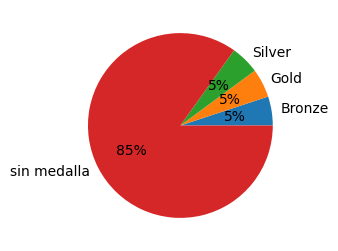

In [ ]:
fig,ax = plt.subplots(figsize =(6, 3))
plt.pie(Medallas_por_Color.ID, labels=Medallas_por_Color.index,autopct = '%0.0f%%')
plt.show()

Se visualiza que hay un **desbalance en los datos**. Donde la categoría "sin medalla" supera ampliamente al resto de las categorías ("Gold", "Silver" y "Bronze")

🔔 **Sólo el 15% de las atletas obtiene una medalla, y con 5% de posibilidad de obtención para cada color. El 85% de las participantes no obtienen preseas.**

**2 - Segmentación el Dataframe df_M por color de Medalla para visualizar el comportamiento de la variable "Medal" en función de otras características**

In [ ]:
df_M_Oro=df_M_1[df_M_1.Medal == "Gold" ] # dataframe para atletas Mujeres con medallas de oro
df_M_Plata=df_M_1[df_M_1.Medal == "Silver" ] # dataframe para atletas Mujeres con medallas de plata
df_M_Bronce=df_M_1[df_M_1.Medal == "Bronze" ] # dataframe para atletas Mujeres con medallas de bronce
df_M_Sin_M=df_M_1[df_M_1.Medal == "sin medalla" ] # dataframe para atletas Mujeres sin medallas

 🎂 **3 - Análisis de la Edad de las Atletas**

*a - Distribción de Edades por color de medalla*

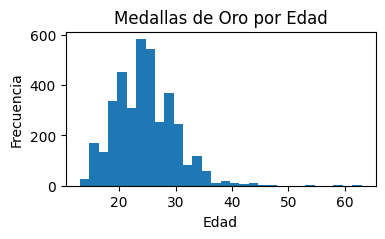

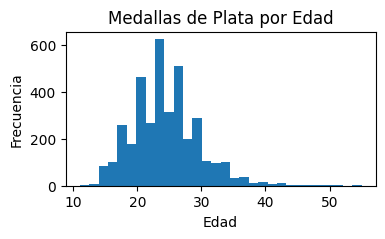

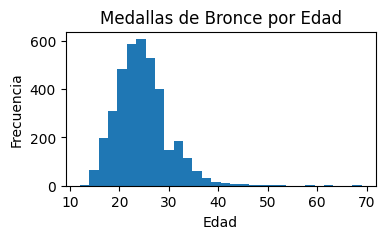

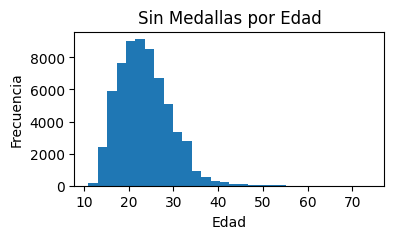

In [ ]:
mpl.style.use('default')

fig, ax = plt.subplots(figsize=(4,2))
ax.hist(x= df_M_Oro.Age, bins=30, density=False, orientation='vertical')
ax.set_xlabel('Edad')
ax.set_ylabel('Frecuencia')
ax.set_title('Medallas de Oro por Edad')

fig, ax = plt.subplots(figsize=(4,2))
ax.hist(x= df_M_Plata.Age, bins=30, density=False, orientation='vertical')
ax.set_xlabel('Edad')
ax.set_ylabel('Frecuencia')
ax.set_title('Medallas de Plata por Edad')

fig, ax = plt.subplots(figsize=(4,2))
ax.hist(x= df_M_Bronce.Age, bins=30, density=False, orientation='vertical')
ax.set_xlabel('Edad')
ax.set_ylabel('Frecuencia')
ax.set_title('Medallas de Bronce por Edad')
mpl.style.use('default')

fig, ax = plt.subplots(figsize=(4,2))
ax.hist(x= df_M_Sin_M.Age, bins=30, density=False, orientation='vertical')
ax.set_xlabel('Edad')
ax.set_ylabel('Frecuencia')
ax.set_title('Sin Medallas por Edad')

plt.show()

In [ ]:
edad_1 = {edad_1: np.array(df_M_1['Age']) for edad_1, df_M_1 in df_M_1.groupby('Medal')}

In [ ]:
fig = ridgeplot(samples=edad_1.values(),bandwidth = 4, colorscale="magma", colormode='index', labels = edad_1.keys(), coloralpha =.5)
fig.update_layout(title = 'Distribución de edades por medalla', 
                  height=900,
                  width=500,
                 yaxis_title="Medalla",
                 xaxis_title="Edad")

*b - Valores estadísticos*









🥇*Oro*

In [ ]:
df_M_Oro.Age.describe() # Valores Estadísticos

count    3747.000000
mean       24.378436
std         5.223805
min        13.000000
25%        21.000000
50%        24.000000
75%        27.500000
max        63.000000
Name: Age, dtype: float64

In [ ]:
mode(df_M_Oro.Age) # Moda

22.0

 🥈*Plata*

In [ ]:
df_M_Plata.Age.describe() # Valores Estadísticos

count    3735.000000
mean       24.450870
std         5.259234
min        11.000000
25%        21.000000
50%        24.000000
75%        27.000000
max        55.000000
Name: Age, dtype: float64

In [ ]:
mode(df_M_Plata.Age) # Moda

23.0

 🥉*Bronce*

In [ ]:
df_M_Bronce.Age.describe() # Valores Estadísticos

count    3771.000000
mean       24.705118
std         5.338566
min        12.000000
25%        21.000000
50%        24.000000
75%        28.000000
max        69.000000
Name: Age, dtype: float64

In [ ]:
mode(df_M_Bronce.Age) # Moda

25.0

 😐 *Sin Medalla*

In [ ]:
df_M_Sin_M.Age.describe() # Valores Estadísticos 

count    63125.000000
mean        23.554836
std          5.752198
min         11.000000
25%         19.000000
50%         23.000000
75%         27.000000
max         74.000000
Name: Age, dtype: float64

In [ ]:
mode(df_M_Sin_M.Age) # Moda

21.0

**Hallazgos sobre la Edad**

🔔 El promedio de edad de consecución de una medalla (de cualquier color) es 24 años.

🔔 El promedio de edad de las atletas que no consiguen medallas es 23 años. 

🔔 La moda de las atletas que consiguen atletas es de 22, 23 y 25 para Oro, Plata y Bronce respectivamente. La edad más frecuente en que no se obienen medallas es 21 años.

👠 **4 - Análisis de la Altura de las Atletas**

*a - Distribución de las medallas según la altura de las atletas*

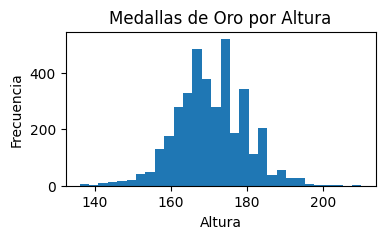

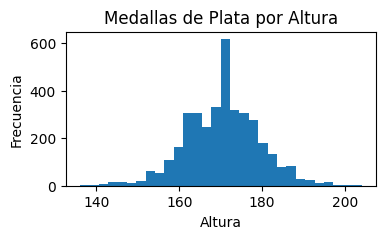

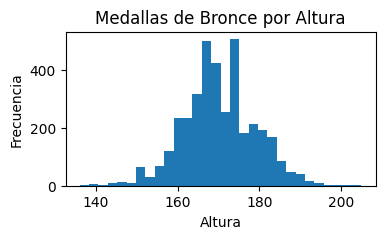

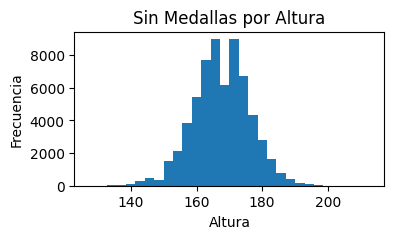

In [ ]:
mpl.style.use('default')

fig, ax = plt.subplots(figsize=(4,2))
ax.hist(x= df_M_Oro.Height, bins=30, density=False, orientation='vertical')
ax.set_xlabel('Altura')
ax.set_ylabel('Frecuencia')
ax.set_title('Medallas de Oro por Altura')

fig, ax = plt.subplots(figsize=(4,2))
ax.hist(x= df_M_Plata.Height, bins=30, density=False, orientation='vertical')
ax.set_xlabel('Altura')
ax.set_ylabel('Frecuencia')
ax.set_title('Medallas de Plata por Altura')

fig, ax = plt.subplots(figsize=(4,2))
ax.hist(x= df_M_Bronce.Height, bins=30, density=False, orientation='vertical')
ax.set_xlabel('Altura')
ax.set_ylabel('Frecuencia')
ax.set_title('Medallas de Bronce por Altura')

fig, ax = plt.subplots(figsize=(4,2))
ax.hist(x= df_M_Sin_M.Height, bins=30, density=False, orientation='vertical')
ax.set_xlabel('Altura')
ax.set_ylabel('Frecuencia')
ax.set_title('Sin Medallas por Altura')
plt.show()

In [ ]:
altura_1 = {altura_1: np.array(df_M_1['Height']) for altura_1, df_M_1 in df_M_1.groupby('Medal')}


In [ ]:
fig = ridgeplot(samples=altura_1.values(),bandwidth = 4, colorscale="magma", colormode='index', labels = altura_1.keys(), coloralpha =.5)
fig.update_layout(title = 'Distribución de alturas por medalla', 
                  height=900,
                  width=500,
                 yaxis_title="Medalla",
                 xaxis_title="Altura")

*b - Valores estadísticos*

🥇 *Oro*

In [ ]:
df_M_Oro.Height.describe() # Valores Estadísticos

count    3747.000000
mean      170.636509
std         9.099570
min       136.000000
25%       165.000000
50%       170.000000
75%       176.000000
max       210.000000
Name: Height, dtype: float64

In [ ]:
mode(df_M_Oro.Height) # Moda

170.0

🥈 *Plata*

In [ ]:
df_M_Plata.Height.describe() # Valores Estadísticos

count    3735.000000
mean      170.428112
std         8.899012
min       136.000000
25%       165.000000
50%       170.000000
75%       176.000000
max       204.000000
Name: Height, dtype: float64

In [ ]:
mode(df_M_Plata.Height) # Moda

170.0

🥉 *Bronce*

In [ ]:
df_M_Bronce.Height.describe() # Valores Estadísticos

count    3771.000000
mean      170.222222
std         8.891951
min       136.000000
25%       165.000000
50%       170.000000
75%       176.000000
max       205.000000
Name: Height, dtype: float64

In [ ]:
mode(df_M_Bronce.Height) # Moda

170.0

😶 *Sin medalla*

In [ ]:
df_M_Sin_M.Height.describe() # Valores Estadísticos

count    63125.000000
mean       167.506123
std          8.649010
min        127.000000
25%        162.000000
50%        168.000000
75%        173.000000
max        213.000000
Name: Height, dtype: float64

In [ ]:
mode(df_M_Sin_M.Height) # Moda

170.0

**Hallazgos sobre la Altura**

🔔 La altura promedio de las atletas que obtienen algún tipo de medalla es 170 cm.

🔔 La altura promedio de las atletas que no obtienen medallas es de 167 cm. 

🔔 La altura mínima de las atletas que obtuvieron medallas es de 136 cm.

🔔 La altura mínima de las atletas que no obtuvieron medallas es de 127 cm. 
 
🔔 Las alturas más frecuentes de las atletas con cualquier color de medalla es es de 167 cm.

⚖ **5 - Análisis del Peso de las Atletas**



*a- Distribución de las medallas según el peso de las atletas*

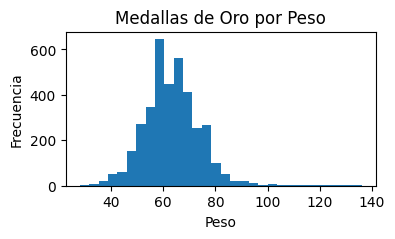

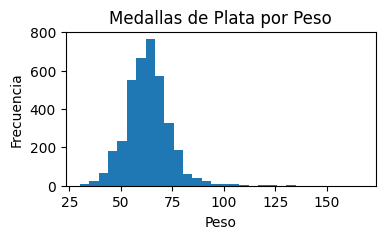

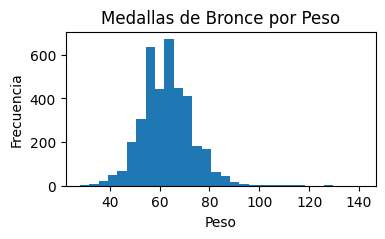

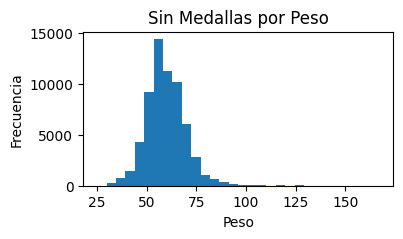

In [ ]:
mpl.style.use('default')

fig, ax = plt.subplots(figsize=(4,2))
ax.hist(x= df_M_Oro.Weight, bins=30, density=False, orientation='vertical')
ax.set_xlabel('Peso')
ax.set_ylabel('Frecuencia')
ax.set_title('Medallas de Oro por Peso')

fig, ax = plt.subplots(figsize=(4,2))
ax.hist(x= df_M_Plata.Weight, bins=30, density=False, orientation='vertical')
ax.set_xlabel('Peso')
ax.set_ylabel('Frecuencia')
ax.set_title('Medallas de Plata por Peso')

fig, ax = plt.subplots(figsize=(4,2))
ax.hist(x= df_M_Bronce.Weight, bins=30, density=False, orientation='vertical')
ax.set_xlabel('Peso')
ax.set_ylabel('Frecuencia')
ax.set_title('Medallas de Bronce por Peso')

fig, ax = plt.subplots(figsize=(4,2))
ax.hist(x= df_M_Sin_M.Weight, bins=30, density=False, orientation='vertical')
ax.set_xlabel('Peso')
ax.set_ylabel('Frecuencia')
ax.set_title('Sin Medallas por Peso')
plt.show()

In [ ]:
peso_1 = {peso_1: np.array(df_M_1['Weight']) for peso_1, df_M_1 in df_M_1.groupby('Medal')}

In [ ]:
fig = ridgeplot(samples=peso_1.values(),bandwidth = 4, colorscale="magma", colormode='index', labels = peso_1.keys(), coloralpha =.5)
fig.update_layout(title = 'Distribución de pesos por medalla', 
                  height=900,
                  width=500,
                 yaxis_title="Medalla",
                 xaxis_title="Peso")

🥇 **Oro**

In [ ]:
df_M_Oro.Weight.describe() # Valores Estadísticos

count    3747.000000
mean       63.311716
std        10.907536
min        28.000000
25%        57.000000
50%        63.000000
75%        70.000000
max       136.000000
Name: Weight, dtype: float64

In [ ]:
mode(df_M_Oro.Weight) # Moda

63.0

🥈 **Plata**

In [ ]:
df_M_Plata.Weight.describe() # Valores Estadísticos

count    3735.000000
mean       63.079920
std        10.648111
min        30.000000
25%        57.000000
50%        63.000000
75%        69.000000
max       167.000000
Name: Weight, dtype: float64

In [ ]:
mode(df_M_Plata.Weight) # Moda

60.0

🥉 **Bronce**

In [ ]:
df_M_Bronce.Weight.describe() # Valores Estadísticos 

count    3771.000000
mean       63.010475
std        10.432356
min        28.000000
25%        56.000000
50%        62.000000
75%        69.000000
max       141.000000
Name: Weight, dtype: float64

In [ ]:
mode(df_M_Bronce.Weight) # Moda

63.0

😶 **Sin Medalla**

In [ ]:
df_M_Sin_M.Weight.describe() # Valores Estadísticos

count    63125.000000
mean        59.636404
std         10.042630
min         25.000000
25%         53.000000
50%         59.000000
75%         65.000000
max        167.000000
Name: Weight, dtype: float64

In [ ]:
mode(df_M_Sin_M.Weight) # Moda

60.0

**Hallazgos sobre el Peso**

🔔 El peso promedio de las atletas que obtienen una medalla de oro o de plta es 63 kilos.

🔔 El peso promedio de las atletas que obtienen una medalla  de bronce es 62 kilos. 

🔔 El peso promedio de las atletas que no obtienen medalla es 59 kilos. 

🔔 El peso mas frecuente para oro y bronce es 60 kilos, mientras que para plata y sin medalla en 60 kilos

 🗺 **6 - Análisis de las medallas por NOC que representa a las atletas**

In [ ]:
tmp = df_M_1.groupby(['NOC', 'Medal'])['ID'].agg('count').dropna()
df = pd.DataFrame(tmp).reset_index()

In [ ]:
dfG = df[df['Medal']=='Gold']
dfS = df[df['Medal']=='Silver']
dfB = df[df['Medal']=='Bronze']
dfSM = df[df['Medal']== 'sin medalla']

In [ ]:
traceG = go.Bar(
    x = dfG['NOC'],y = dfG['ID'],
    name="Gold",
     marker=dict(
                color='gold',
                line=dict(
                    color='black',
                    width=1),
                opacity=0.5,
            ),
    text = dfG['NOC'],
    #orientation = 'h'
)
traceS = go.Bar(
    x = dfS['NOC'],y = dfS['ID'],
    name="Silver",
    marker=dict(
                color='Grey',
                line=dict(
                    color='black',
                    width=1),
                opacity=0.5,
            ),
    text=dfS['NOC'],
    #orientation = 'h'
)

traceB = go.Bar(
    x = dfB['NOC'],y = dfB['ID'],
    name="Bronze",
    marker=dict(
                color='Brown',
                line=dict(
                    color='black',
                    width=1),
                opacity=0.5,
            ),
    text=dfB['NOC'],
   # orientation = 'h'
)

traceSM = go.Bar(
    x = dfSM['NOC'],y = dfSM['ID'],
    name="sin medalla",
    marker=dict(
                color='red',
                line=dict(
                    color='black',
                    width=1),
                opacity=0.5,
            ),
    text=dfSM['NOC'],
   # orientation = 'h'
)
data = [traceG, traceS, traceB, traceSM]
layout = dict(title = 'Medallas por NOC',
          xaxis = dict(title = 'NOC', showticklabels=True, tickangle=45,
            tickfont=dict(
                size=8,
                color='black'),), 
          yaxis = dict(title = 'Número de medallas'),
          hovermode = 'closest',
          barmode='stack',
          showlegend=False,
          width=1200,
          height=600,
         )
fig = dict(data=data, layout=layout)
iplot(fig, filename='Medal')

🔔 **El NOC "USA" ha obtenido históricamente mayor cantidad de medallas, pero también se registra mayor participación de atletas que representan ese Comité. Se debe realizar un análisis relativo entre la cantidad de preseas obtenidas en relación a los atletas participantes.**

**Nota para el Profesor/Tutor:** Este gráfico fue replicado de un notebook publicado en Kaggle (https://www.kaggle.com/code/gpreda/plotly-tutorial-120-years-of-olympic-games/notebook#Medals) 

Se han adaptado las variables pero no es un desarrollo propio o que se haya visto en el curso. Se agrega porque se considera muy práctico para la interpretación de esta distribución. 

**FEATURE SELECTION**

**1 - Selección de las características para reducir la dimensionalidad del conjunto a fin de mejorar su rendimiento.**

In [ ]:
df_M_1

ID                                 Name Sex   Age  Height  ...  \
4            5             Christine Jacoba Aaftink   F  21.0   185.0  ...   
5            5             Christine Jacoba Aaftink   F  21.0   185.0  ...   
6            5             Christine Jacoba Aaftink   F  25.0   185.0  ...   
7            5             Christine Jacoba Aaftink   F  25.0   185.0  ...   
8            5             Christine Jacoba Aaftink   F  27.0   185.0  ...   
...        ...                                  ...  ..   ...     ...  ...   
271080  135553  Galina Ivanovna Zybina (-Fyodorova)   F  33.0   168.0  ...   
271099  135560                    Stavroula Zygouri   F  36.0   171.0  ...   
271102  135563            Olesya Nikolayevna Zykina   F  19.0   171.0  ...   
271103  135563            Olesya Nikolayevna Zykina   F  23.0   171.0  ...   
271110  135568               Olga Igorevna Zyuzkova   F  33.0   171.0  ...   

        Season            City          Sport  \
4       Winter         Calgary  Speed Skating   
5       Winter         Calgary  Speed Skating   
6       Winter     Albertville  Speed Skating   
7       Winter     Albertville  Speed Skating   
8       Winter     Lillehammer  Speed Skating   
...        ...             ...            ...   
271080  Summer           Tokyo      Athletics   
271099  Summer          Athina      Wrestling   
271102  Summer          Sydney      Athletics   
271103  Summer          Athina      Athletics   
271110  Summer  Rio de Janeiro     Basketball   

                                            Event        Medal  
4                Speed Skating Women's 500 metres  sin medalla  
5              Speed Skating Women's 1,000 metres  sin medalla  
6                Speed Skating Women's 500 metres  sin medalla  
7              Speed Skating Women's 1,000 metres  sin medalla  
8                Speed Skating Women's 500 metres  sin medalla  
...                                           ...          ...  
271080                 Athletics Women's Shot Put       Bronze  
271099  Wrestling Women's Middleweight, Freestyle  sin medalla  
271102     Athletics Women's 4 x 400 metres Relay       Bronze  
271103     Athletics Women's 4 x 400 metres Relay       Silver  
271110              Basketball Women's Basketball  sin medalla  

[74378 rows x 15 columns]

In [ ]:
df_M_1.columns # Vemos las columnas de df

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

**2 - Codificación de las variables "Medal" y "NOC", "Sport" y "Season"**

In [ ]:
df_M_Cod=df_M_1 # Se crea un df denominado df_M_Cod 

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
# NOC
encoder = OrdinalEncoder(categories=[["CHN", "DEN", "NED", "USA", "FIN", "NOR", "ROU", "EST", "FRA", "MAR", "ESP", "EGY", "IRI", "BUL", "ITA", "CHA", "AZE", "SUD", "RUS", "ARG", "CUB", "BLR", "GRE", "CMR", "TUR", "CHI", "MEX", "URS", "NCA", "HUN", "NGR", "ALG", "KUW", "BRN", "PAK", "IRQ", "UAR", "LIB", "QAT", "MAS", "GER", "CAN", "IRL", "AUS", "RSA", "ERI", "TAN", "JOR", "TUN", "LBA", "BEL", "DJI", "PLE", "COM", "KAZ", "BRU", "IND", "KSA", "SYR", "MDV", "ETH", "UAE", "YAR", "INA", "PHI", "SGP", "UZB", "KGZ", "TJK", "EUN", "JPN", "CGO", "SUI", "BRA", "FRG", "GDR", "MON", "ISR", "URU", "SWE", "ISV", "SRI", "ARM", "CIV", "KEN", "BEN", "UKR", "GBR", "GHA", "SOM", "LAT", "NIG", "MLI", "AFG", "POL", "CRC", "PAN", "GEO", "SLO", "CRO", "GUY", "NZL", "POR", "PAR", "ANG", "VEN", "COL", "BAN", "PER", "ESA", "PUR", "UGA", "HON", "ECU", "TKM", "MRI", "SEY", "TCH", "LUX", "MTN", "CZE", "SKN", "TTO", "DOM", "VIN", "JAM", "LBR", "SUR", "NEP", "MGL", "AUT", "PLW", "LTU", "TOG", "NAM", "AHO", "ISL", "ASA", "SAM", "RWA", "DMA", "HAI", "MLT", "CYP", "GUI", "BIZ", "YMD", "KOR", "THA", "BER", "ANZ", "SCG", "SLE", "PNG", "YEM", "IOA", "OMA", "FIJ", "VAN", "MDA", "YUG", "BAH", "GUA", "SRB", "IVB", "MOZ", "CAF", "MAD", "MAL", "BIH", "GUM", "CAY", "SVK", "BAR", "GBS", "TLS", "COD", "GAB", "SMR", "LAO", "BOT", "ROT", "CAM", "PRK", "SOL", "SEN", "CPV", "CRT", "GEQ", "BOL", "SAA", "AND", "ANT", "ZIM", "GRN", "HKG", "LCA", "FSM", "MYA", "MAW", "ZAM", "RHO", "TPE", "STP", "MKD", "BOH", "TGA", "LIE", "MNE", "GAM", "COK", "ALB", "WIF", "SWZ", "BUR", "NBO", "BDI", "ARU", "NRU", "VNM", "VIE", "BHU", "MHL", "KIR", "UNK", "TUV", "NFL", "KOS", "SSD", "LES"]]) # Creamos el codificador indicando el orden de la variables


In [ ]:
encoder.fit(df_M_Cod[["NOC"]])
df_M_Cod["NOC_Code"] = encoder.transform(df_M_Cod[["NOC"]])

In [ ]:
# Sport
encoder = OrdinalEncoder(categories=[["Basketball","Judo","Football","Tug-Of-War","Speed Skating","Cross Country Skiing","Athletics","Ice Hockey","Swimming","Badminton","Sailing","Biathlon","Gymnastics","Art Competitions","Alpine Skiing","Handball","Weightlifting","Wrestling","Luge","Water Polo","Hockey","Rowing","Bobsleigh","Fencing","Equestrianism","Shooting","Boxing","Taekwondo","Cycling","Diving","Canoeing","Tennis","Modern Pentathlon","Figure Skating","Golf","Softball","Archery","Volleyball","Synchronized Swimming","Table Tennis","Nordic Combined","Baseball","Rhythmic Gymnastics","Freestyle Skiing","Rugby Sevens","Trampolining","Beach Volleyball","Triathlon","Ski Jumping","Curling","Snowboarding","Rugby","Short Track Speed Skating","Skeleton","Lacrosse","Polo","Cricket","Racquets","Motorboating","Military Ski Patrol","Croquet","Jeu De Paume","Roque","Alpinism","Basque Pelota","Aeronautics"]])

In [ ]:
encoder.fit(df_M_Cod[["Sport"]])
df_M_Cod["Sport_Code"] = encoder.transform(df_M_Cod[["Sport"]])

In [ ]:
# Season
encoder = OrdinalEncoder(categories=[["Summer", "Winter"]]) 

In [ ]:
encoder.fit(df_M_Cod[["Season"]])
df_M_Cod["Season_Code"] = encoder.transform(df_M_Cod[["Season"]])

In [ ]:
# Medal
encoder = OrdinalEncoder(categories=[["sin medalla","Bronze","Silver","Gold"]]) # Creamos el codificador indicando el orden de la variables

In [ ]:
encoder.fit(df_M_Cod[["Medal"]])
df_M_Cod["Medal_Code"] = encoder.transform(df_M_Cod[["Medal"]])

In [ ]:
df_M_Cod

ID                                 Name Sex   Age  Height  ...  \
4            5             Christine Jacoba Aaftink   F  21.0   185.0  ...   
5            5             Christine Jacoba Aaftink   F  21.0   185.0  ...   
6            5             Christine Jacoba Aaftink   F  25.0   185.0  ...   
7            5             Christine Jacoba Aaftink   F  25.0   185.0  ...   
8            5             Christine Jacoba Aaftink   F  27.0   185.0  ...   
...        ...                                  ...  ..   ...     ...  ...   
271080  135553  Galina Ivanovna Zybina (-Fyodorova)   F  33.0   168.0  ...   
271099  135560                    Stavroula Zygouri   F  36.0   171.0  ...   
271102  135563            Olesya Nikolayevna Zykina   F  19.0   171.0  ...   
271103  135563            Olesya Nikolayevna Zykina   F  23.0   171.0  ...   
271110  135568               Olga Igorevna Zyuzkova   F  33.0   171.0  ...   

              Medal NOC_Code Sport_Code Season_Code  Medal_Code  
4       sin medalla      2.0        4.0         1.0         0.0  
5       sin medalla      2.0        4.0         1.0         0.0  
6       sin medalla      2.0        4.0         1.0         0.0  
7       sin medalla      2.0        4.0         1.0         0.0  
8       sin medalla      2.0        4.0         1.0         0.0  
...             ...      ...        ...         ...         ...  
271080       Bronze     27.0        6.0         0.0         1.0  
271099  sin medalla     22.0       17.0         0.0         0.0  
271102       Bronze     18.0        6.0         0.0         1.0  
271103       Silver     18.0        6.0         0.0         2.0  
271110  sin medalla     21.0        0.0         0.0         0.0  

[74378 rows x 19 columns]

**3 - Eliminación de las columnas que no nos interesan**

Se eliminan las siguientes columnas por no ser consideradas determinantes del desempeño:

**ID:** No es un dato propio de la performance.

**Name:** No es un dato característico de la performance.

**Sex:** No es dato característico de la performance dado que en este estudio se analiza la obtención de medallas por atletas mujeres.

**Team:** Se toma el NOC al cual representa el atelta, en lugar del país. 

**Games:** La ciudad y año del evento no es determinante de la performance para el conjunto.

**Year:** El año no es característico de la performance de una atleta.

**Event:** Inicialmente se toma el deporte (Sport) sin considerar la competencia.

**Medal:** Se ha reemplazado por la columna "Medal_Code".

**Sport:** Se ha reemplazado por la columna "Sport_Code"

**Season:** Se ha reemplazado por la columna "Season_Code"

**NOC:** Se ha reemplazado por la columna "NOC_Code"

**4 - Creación del nuevo dataframe df_M_2**

In [ ]:
df_M_2=df_M_Cod.drop(['ID','Name', 'Sex', 'Team', 'Games', 'NOC', 
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'], axis=1)

In [ ]:
df_M_2

Age  Height  Weight  NOC_Code  Sport_Code  Season_Code  Medal_Code
4       21.0   185.0    82.0       2.0         4.0          1.0         0.0
5       21.0   185.0    82.0       2.0         4.0          1.0         0.0
6       25.0   185.0    82.0       2.0         4.0          1.0         0.0
7       25.0   185.0    82.0       2.0         4.0          1.0         0.0
8       27.0   185.0    82.0       2.0         4.0          1.0         0.0
...      ...     ...     ...       ...         ...          ...         ...
271080  33.0   168.0    80.0      27.0         6.0          0.0         1.0
271099  36.0   171.0    63.0      22.0        17.0          0.0         0.0
271102  19.0   171.0    64.0      18.0         6.0          0.0         1.0
271103  23.0   171.0    64.0      18.0         6.0          0.0         2.0
271110  33.0   171.0    69.0      21.0         0.0          0.0         0.0

[74378 rows x 7 columns]

**5) Definición de X e y**

In [ ]:
X = df_M_2.drop("Medal_Code", 1)       # Matrtiz de características
y = df_M_2['Medal_Code']               # Caracerística objetivo
df_M_2.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



Age  Height  Weight  NOC_Code  Sport_Code  Season_Code  Medal_Code
4  21.0   185.0    82.0       2.0         4.0          1.0         0.0
5  21.0   185.0    82.0       2.0         4.0          1.0         0.0
6  25.0   185.0    82.0       2.0         4.0          1.0         0.0
7  25.0   185.0    82.0       2.0         4.0          1.0         0.0
8  27.0   185.0    82.0       2.0         4.0          1.0         0.0

In [ ]:
df_M_2 = df_M_1.reindex(columns=['Age','Height','Weight','NOC_Code','Medal_Code']) # Reindexación para dejar la variable "Medal_Code" en última posición
df_M_2

Age  Height  Weight  NOC_Code  Medal_Code
4       21.0   185.0    82.0       2.0         0.0
5       21.0   185.0    82.0       2.0         0.0
6       25.0   185.0    82.0       2.0         0.0
7       25.0   185.0    82.0       2.0         0.0
8       27.0   185.0    82.0       2.0         0.0
...      ...     ...     ...       ...         ...
271080  33.0   168.0    80.0      27.0         1.0
271099  36.0   171.0    63.0      22.0         0.0
271102  19.0   171.0    64.0      18.0         1.0
271103  23.0   171.0    64.0      18.0         2.0
271110  33.0   171.0    69.0      21.0         0.0

[74378 rows x 5 columns]

In [ ]:
X # Visualización de la matriz de caracteríticas

Age  Height  Weight  NOC_Code  Sport_Code  Season_Code
4       21.0   185.0    82.0       2.0         4.0          1.0
5       21.0   185.0    82.0       2.0         4.0          1.0
6       25.0   185.0    82.0       2.0         4.0          1.0
7       25.0   185.0    82.0       2.0         4.0          1.0
8       27.0   185.0    82.0       2.0         4.0          1.0
...      ...     ...     ...       ...         ...          ...
271080  33.0   168.0    80.0      27.0         6.0          0.0
271099  36.0   171.0    63.0      22.0        17.0          0.0
271102  19.0   171.0    64.0      18.0         6.0          0.0
271103  23.0   171.0    64.0      18.0         6.0          0.0
271110  33.0   171.0    69.0      21.0         0.0          0.0

[74378 rows x 6 columns]

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74378 entries, 4 to 271110
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          74378 non-null  float64
 1   Height       74378 non-null  float64
 2   Weight       74378 non-null  float64
 3   NOC_Code     74378 non-null  float64
 4   Sport_Code   74378 non-null  float64
 5   Season_Code  74378 non-null  float64
dtypes: float64(6)
memory usage: 6.0 MB


In [ ]:
y # Visualización de la caracterítica objetivo

4         0.0
5         0.0
6         0.0
7         0.0
8         0.0
         ... 
271080    1.0
271099    0.0
271102    1.0
271103    2.0
271110    0.0
Name: Medal_Code, Length: 74378, dtype: float64

**6) Selección**

In [ ]:
import statsmodels.api as sm # Aplicación del modelo

def forward_selection(data, target, significance_level=0.01):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [ ]:
forward_selection(X,y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: Deprecat

['NOC_Code', 'Weight', 'Sport_Code', 'Season_Code', 'Height', 'Age']

Las funciones en el conjunto de datos que más contribuyen a la variable objetivo son: **'Weight', 'NOC_Code', 'Sport_Code', 'Season_Code', 'Height', 'Age'**

**EVALUACIÓN DE MODELOS ML**

**1 - Arbol de decisión**

In [ ]:
features_response = df_M_2.columns.tolist() # Listado las características
features_response


['Age', 'Height', 'Weight', 'NOC_Code', 'Medal_Code']

In [ ]:
df_M_2.groupby('Medal_Code')['Age'].count()/len(df_M_2) # Frecuencia relativa de cada color de medalla

Medal_Code
0.0    0.848705
1.0    0.050700
2.0    0.050216
3.0    0.050378
Name: Age, dtype: float64

In [ ]:
# Librerias para la declaración y ajuste del modelo
from sklearn.model_selection import train_test_split
from sklearn import tree

In [ ]:
# Separación al dataset en train y test
X_train, X_test, y_train, y_test = train_test_split(df_M_2[features_response[:-1]].values, df_M_2['Medal_Code'].values,
                 test_size=0.2, random_state=24)

In [ ]:
dt = tree.DecisionTreeClassifier(max_depth=4) # Definición del modelo

In [ ]:
dt.fit(X_train, y_train) # Ajuste el modelo

DecisionTreeClassifier(max_depth=4)

In [ ]:
dot_data = tree.export_graphviz(dt,
                                out_file=None,
                                filled=True,
                                rounded=True,
                                feature_names=features_response[:-1],
                                proportion=True,
                                class_names=[
                                    'sin medalla', 'Bronce', 'Silver', 'Gold'])

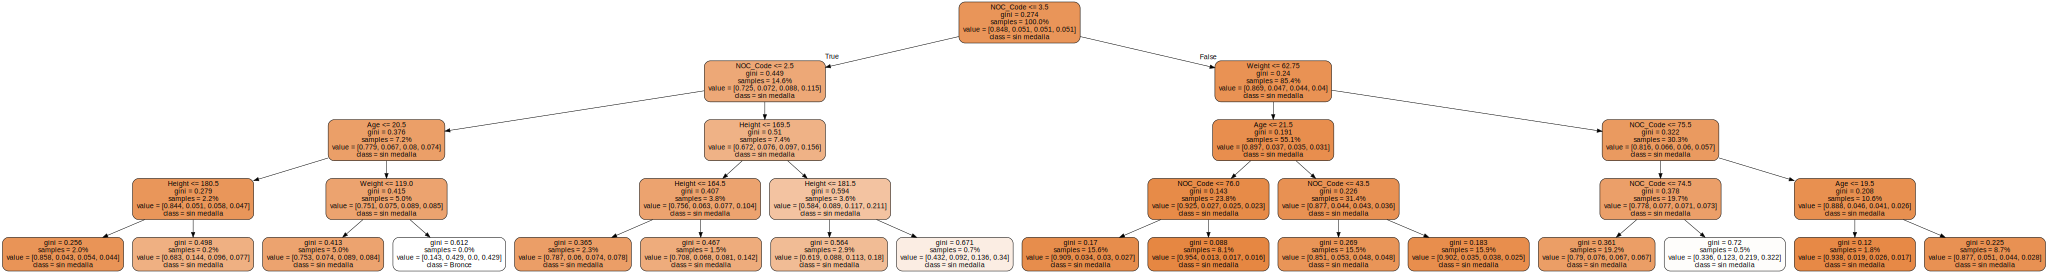

In [ ]:
graph = graphviz.Source(dot_data) # Creación del árbol
graph

**2 - Random Forest**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)

In [ ]:
!pip install -U imbalanced-learn
from pylab import rcParams
 
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached imbalanced_learn-0.9.1-py3-none-any.whl (199 kB)


In [ ]:
# Creación de modelo Random Forest con parámetros por defecto
modelo = RandomForestClassifier(random_state=1)
modelo.fit(X_train, y_train)
# Obtención de las predicciones del modelo con X_test y X_train
preds = modelo.predict(X_test)
preds_1 = modelo.predict(X_train)

**3 - Matriz de Confusión**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



<Figure size 1000x600 with 0 Axes>

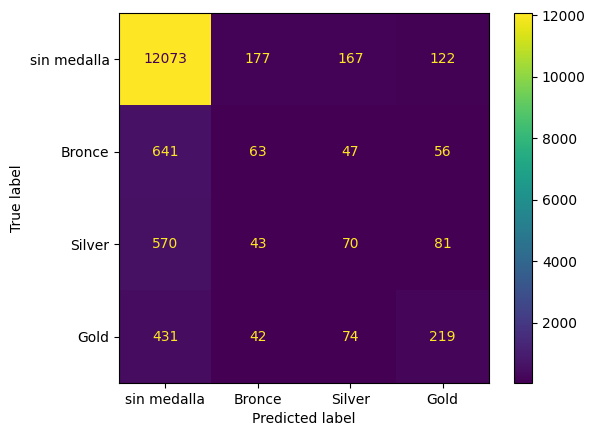

In [ ]:
plt.figure(figsize=(10,6))
metrics.plot_confusion_matrix(modelo, X_test, y_test, display_labels=['sin medalla', 'Bronce', 'Silver', 'Gold'])

El modelo predice correctamente 12.073 no medallistas que no obtuvieran medalla, 63 medallistas de bronce que obtuvieron medalla de Bronce, 79 medallistas de plata que obtuvieron medalla de Plata y 219 medallistas de oro que obtuvieorn preseas de Oro. 

Asimismo predice incorrectamente como no medallistas 641 atletas que obtuvieron Bronce, 570 que obtuvieron Plata y 431 que obtuvieron Oro. 

También se visualizan el resto de las combinaciones de predicciones

**a) Comparación de Matriz de Confusión con conjunto de entrenamiento y de prueba**

In [ ]:
confusion = metrics.confusion_matrix(y_test, preds) # Conjunto de Prueba
confusion

array([[12073,   177,   167,   122],
       [  641,    63,    47,    56],
       [  570,    43,    70,    81],
       [  431,    42,    74,   219]])

In [ ]:
confusion = metrics.confusion_matrix(y_train, preds_1) # Conjunto de Entrenamiento
confusion

array([[50259,    99,    99,   129],
       [  753,  2082,    54,    75],
       [  653,    64,  2130,   124],
       [  475,    54,    83,  2369]])

**4 - Métricas**

**a - Accuarcy: Exactitud (Porcentaje de elementos clasificados correctamente)**

In [ ]:
accuracy = metrics.accuracy_score(y_test, preds) # Conjunto de Prueba 
accuracy 

0.8352379671954827

In [ ]:
accuracy = metrics.accuracy_score(y_train, preds_1) # Conjunto de Entrenamiento
accuracy 

0.9552620079997312

**El conjunto de entrenamimento clasifica correctamente los elementos con 0.95 de exactitud, mientras que el de prueba lo hace con un 0.83. Ambos valores son aceptables pero el de prueba es algo menor, lo que podría indicarnos  Underfitting, esto es para el conjunto de características.**

Revisamos las métricas para cada categoría.

**b - Precisión (sin medalla - bronce - plata - oro)**

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test, preds, average=None) # Conjunto de Prueba

array([0.88027707, 0.19384615, 0.19553073, 0.458159  ])

In [ ]:
precision_score(y_train, preds_1, average=None) # Conjunto de Entrenamiento

array([0.96392405, 0.90561114, 0.90025359, 0.87838339])

**El conjunto de entrenamiento ha clasificado correctamente el 0.96, 0.90, 0.90 y 0.87 de las muestras como "sin medalla", "bronce", "plata y "oro" respectivamente. Si comparamos esas mediciones con las obtenidas en el conjunto de prueba, estas son significativamene menores para las categorías "bronce", "plata y "oro". No así para la clase "sin medalla" que es la mayoritaria en el conjunto de datos que se torna desbalanceado.**

**c - Sensibilidad (Verdaderos positivos) (sin medalla - bronce - plata - oro)**

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_test, preds, average=None) # Conjunto de Prueba

array([0.96283595, 0.07806691, 0.09162304, 0.28590078])

In [ ]:
recall_score(y_train, preds_1, average=None) # Conjunto de Entrenamiento

array([0.99353576, 0.70242915, 0.71693033, 0.79469977])

**La tasa de verdaderos positivos para el conjunto de entrenamiento es del 0.99, 0.70, 0.71 y 0.79 para las clases "sin medalla", "bronce", "plata" y "oro" respectivamente. En cambio en el conjunto de prueba las métricas para "bronce", "plata" y "oro" son bastante menores. Nuevamente esto no se cumple para la clase mayoritaria "sin medalla" que conserva en el conjunto de prueba un alto score.**


**d - F1 Score (Precisión y Sensibilidad)**

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, preds, average=None) # Conjunto de Prueba

array([0.91970747, 0.11130742, 0.12477718, 0.35209003])

In [ ]:
f1_score(y_train, preds_1, average=None) # Conjunto de Entrenamiento

array([0.97850593, 0.79118374, 0.79820124, 0.83444875])

**Nuevamente se cumple que la métrica tiene una buena performance en ambos conjuntos para clase mayoritaria detectando confiablemente la clase "sin medalla", no así para el resto.**

In [ ]:
# Todas las métricas sobre el conjunto de Prueba (sin medalla - bronce - plata  oro)
print(metrics.classification_report(y_test, preds)) # Conjunto de Prueba

              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92     12539
         1.0       0.19      0.08      0.11       807
         2.0       0.20      0.09      0.12       764
         3.0       0.46      0.29      0.35       766

    accuracy                           0.84     14876
   macro avg       0.43      0.35      0.38     14876
weighted avg       0.79      0.84      0.81     14876



In [ ]:
# Todas las métricas sobre el conjunto de entrenamiento (sin medalla - bronce - plata - oro)
print(metrics.classification_report(y_train, preds_1)) # Conjunto de Entrenamiento

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98     50586
         1.0       0.91      0.70      0.79      2964
         2.0       0.90      0.72      0.80      2971
         3.0       0.88      0.79      0.83      2981

    accuracy                           0.96     59502
   macro avg       0.91      0.80      0.85     59502
weighted avg       0.95      0.96      0.95     59502



**5 - Conclusiones: Se puede afirmar que el modelo tiene buena performance en el conjunto de entrenamiento para todas las clases, pero para el conjunto de prueba la performance de las categorías minoritarias ("bronce", "plata" y "oro") disminuye drásticamente. Se concluye que el modelo está subajustado (Underfitting)**

**6 - Acciones correctivas propuestas**

a) Remediar el desbalance de los datos

b) Revisar las variables intervinientes

c) Efectuar análisis más complejos, segmentando por otras características

**Tratamiento de desbalance de datos**

Probamos con el balanceo de los datos mediante el parámetro "class_weight"

In [ ]:
modelo_bal = RandomForestClassifier(n_estimators=100, class_weight='balanced')

In [ ]:
modelo_bal.fit(X_train, y_train)
# Obtención de las predicciones del modelo con X_test y X_train
preds = modelo_bal.predict(X_test)
preds_1 = modelo_bal.predict(X_train)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



<Figure size 1000x600 with 0 Axes>

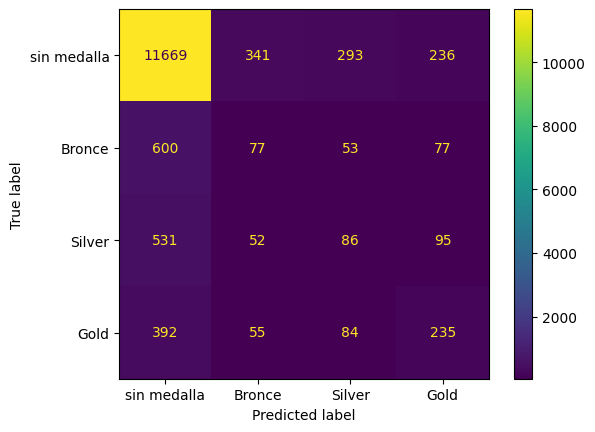

In [ ]:
# Matriz de confusión
plt.figure(figsize=(10,6))
metrics.plot_confusion_matrix(modelo_bal, X_test, y_test, display_labels=['sin medalla', 'Bronce', 'Silver', 'Gold'])


In [ ]:
confusion = metrics.confusion_matrix(y_test, preds) # Conjunto de Prueba
confusion

array([[11669,   341,   293,   236],
       [  600,    77,    53,    77],
       [  531,    52,    86,    95],
       [  392,    55,    84,   235]])

In [ ]:
confusion = metrics.confusion_matrix(y_train, preds_1) # Conjunto de Entrenamiento
confusion

array([[47488,  1209,  1044,   845],
       [   33,  2749,    82,   100],
       [   23,    91,  2703,   154],
       [   16,    75,   113,  2777]])

In [ ]:
# Todas las métricas sobre el conjunto de Prueba (sin medalla - bronce - plata  oro)
print(metrics.classification_report(y_test, preds)) # Conjunto de Prueba

              precision    recall  f1-score   support

         0.0       0.88      0.93      0.91     12539
         1.0       0.15      0.10      0.12       807
         2.0       0.17      0.11      0.13       764
         3.0       0.37      0.31      0.33       766

    accuracy                           0.81     14876
   macro avg       0.39      0.36      0.37     14876
weighted avg       0.78      0.81      0.79     14876



In [ ]:
# Todas las métricas sobre el conjunto de entrenamiento (sin medalla - bronce - plata - oro)
print(metrics.classification_report(y_train, preds_1)) # Conjunto de Entrenamient

              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97     50586
         1.0       0.67      0.93      0.78      2964
         2.0       0.69      0.91      0.78      2971
         3.0       0.72      0.93      0.81      2981

    accuracy                           0.94     59502
   macro avg       0.77      0.93      0.83     59502
weighted avg       0.95      0.94      0.94     59502



✋ **Vemos que las métricas no han mejorado de foma notoria por lo que se intentará:**

**a) Revisar las variables intervinientes**

**b) Efectuar análisis más esepecíficos, segmentando por diversas características**

**Dados los resultados anteriores, se hará un enfoque más específico, tomando algunos deportes para probar el modelo. Se inicia con la disciplina "Gimnasia"**

**Previo a este estudio se efectuará el análisis de las variables y su relación para esta disciplina.** 

**GIMNASIA ARTÍSITICA FEMENINA**

📖 **UN POCO DE HISTORA**

***La gimnasia artística es una de las tres disciplinas de la gimnasia. Es disciplina olímpica desde el inicio de los Juegos Olímpicos modernos, siendo su primera aparición en la edición inaugural de Atenas 1896. Inicialmente solo existía la categoría masculina, pero en Ámsterdam 1928 se incluyó la categoría femenina.***

**Gimnasia artística femenina**

***La gimnasia artística femenina cuenta con cuatro pruebas: salto de potro, barras asimétricas, barra de equilibrio y suelo. En ambas categorías se compiten por medallas individuales y por países nacionales. Los jueces evalúan a cada atleta por la complejidad y estética de las técnicas ejecutadas.***


***En la retina de muchos amantes de este deporte aún está el 10 perfecto de la exgimnasta rumana Nadia Comaneci, el primero de la historia de la competición, en Montreal 76. También encontramos otros mitos como Sawao Kato, Larisa Latynina, Shannon Miller; o más recientemente la reina del suelo, Simone Biles.***

***Actualmente en la categoría femenina las gimnastas destacadas proceden de Estados Unidos, el Comité Olímpico Ruso y la República Popular de China. Desde Sidney 2000, la selección masculina de la República Popular de China. En Rio 2016, el equipo femenino de Estados Unidos fue el más laureado, de la mano de Simone Biles que logró cuatro oros, convirtiéndose en leyenda Olímpica.***

Fuente: https://as.com/juegos_olimpicos


🔎 **EDA**

Se define el dataframe para abordar el análisis de la Gimnasia femenina en los Juegos Olímpicos

In [ ]:
df_M

ID                                 Name Sex   Age  Height  ...  \
4            5             Christine Jacoba Aaftink   F  21.0   185.0  ...   
5            5             Christine Jacoba Aaftink   F  21.0   185.0  ...   
6            5             Christine Jacoba Aaftink   F  25.0   185.0  ...   
7            5             Christine Jacoba Aaftink   F  25.0   185.0  ...   
8            5             Christine Jacoba Aaftink   F  27.0   185.0  ...   
...        ...                                  ...  ..   ...     ...  ...   
271080  135553  Galina Ivanovna Zybina (-Fyodorova)   F  33.0   168.0  ...   
271099  135560                    Stavroula Zygouri   F  36.0   171.0  ...   
271102  135563            Olesya Nikolayevna Zykina   F  19.0   171.0  ...   
271103  135563            Olesya Nikolayevna Zykina   F  23.0   171.0  ...   
271110  135568               Olga Igorevna Zyuzkova   F  33.0   171.0  ...   

        Season            City          Sport  \
4       Winter         Calgary  Speed Skating   
5       Winter         Calgary  Speed Skating   
6       Winter     Albertville  Speed Skating   
7       Winter     Albertville  Speed Skating   
8       Winter     Lillehammer  Speed Skating   
...        ...             ...            ...   
271080  Summer           Tokyo      Athletics   
271099  Summer          Athina      Wrestling   
271102  Summer          Sydney      Athletics   
271103  Summer          Athina      Athletics   
271110  Summer  Rio de Janeiro     Basketball   

                                            Event        Medal  
4                Speed Skating Women's 500 metres  sin medalla  
5              Speed Skating Women's 1,000 metres  sin medalla  
6                Speed Skating Women's 500 metres  sin medalla  
7              Speed Skating Women's 1,000 metres  sin medalla  
8                Speed Skating Women's 500 metres  sin medalla  
...                                           ...          ...  
271080                 Athletics Women's Shot Put       Bronze  
271099  Wrestling Women's Middleweight, Freestyle  sin medalla  
271102     Athletics Women's 4 x 400 metres Relay       Bronze  
271103     Athletics Women's 4 x 400 metres Relay       Silver  
271110              Basketball Women's Basketball  sin medalla  

[74522 rows x 15 columns]

In [ ]:
df_M_Gym=df_M[df_M.Sport == "Gymnastics" ] # dataframe para atletas mujeres gimnastas

In [ ]:
df_M_Gym

ID                Name Sex   Age  Height  ...  Season      City  \
676        394          Irene Abel   F  19.0   160.0  ...  Summer    Munich   
677        394          Irene Abel   F  19.0   160.0  ...  Summer    Munich   
678        394          Irene Abel   F  19.0   160.0  ...  Summer    Munich   
679        394          Irene Abel   F  19.0   160.0  ...  Summer    Munich   
680        394          Irene Abel   F  19.0   160.0  ...  Summer    Munich   
...        ...                 ...  ..   ...     ...  ...     ...       ...   
270907  135479  Tanja uti (-Kober)   F  25.0     NaN  ...  Summer  Helsinki   
270908  135479  Tanja uti (-Kober)   F  25.0     NaN  ...  Summer  Helsinki   
270909  135479  Tanja uti (-Kober)   F  25.0     NaN  ...  Summer  Helsinki   
270910  135479  Tanja uti (-Kober)   F  25.0     NaN  ...  Summer  Helsinki   
270911  135479  Tanja uti (-Kober)   F  25.0     NaN  ...  Summer  Helsinki   

             Sport                                       Event        Medal  
676     Gymnastics    Gymnastics Women's Individual All-Around  sin medalla  
677     Gymnastics          Gymnastics Women's Team All-Around       Silver  
678     Gymnastics           Gymnastics Women's Floor Exercise  sin medalla  
679     Gymnastics              Gymnastics Women's Horse Vault  sin medalla  
680     Gymnastics              Gymnastics Women's Uneven Bars  sin medalla  
...            ...                                         ...          ...  
270907  Gymnastics  Gymnastics Women's Team Portable Apparatus  sin medalla  
270908  Gymnastics           Gymnastics Women's Floor Exercise  sin medalla  
270909  Gymnastics              Gymnastics Women's Horse Vault  sin medalla  
270910  Gymnastics              Gymnastics Women's Uneven Bars  sin medalla  
270911  Gymnastics             Gymnastics Women's Balance Beam  sin medalla  

[9129 rows x 15 columns]

In [ ]:
df_M_Gym.shape # filas y columnas

(9129, 15)

In [ ]:
print(df_M_Gym.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9129 entries, 676 to 270911
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      9129 non-null   int64  
 1   Name    9129 non-null   object 
 2   Sex     9129 non-null   object 
 3   Age     9044 non-null   float64
 4   Height  7640 non-null   float64
 5   Weight  7577 non-null   float64
 6   Team    9129 non-null   object 
 7   NOC     9129 non-null   object 
 8   Games   9129 non-null   object 
 9   Year    9129 non-null   int64  
 10  Season  9129 non-null   object 
 11  City    9129 non-null   object 
 12  Sport   9129 non-null   object 
 13  Event   9129 non-null   object 
 14  Medal   9129 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 1.1+ MB
None


🧹 **LIMPIEZA DE DATOS**

In [ ]:
# Creación de nuevo dataframe
df_M_Gym_1=df_M_Gym.fillna(axis = 0, method = "ffill") # método "ffill"

In [ ]:
df_M_Gym_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9129 entries, 676 to 270911
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      9129 non-null   int64  
 1   Name    9129 non-null   object 
 2   Sex     9129 non-null   object 
 3   Age     9129 non-null   float64
 4   Height  9129 non-null   float64
 5   Weight  9129 non-null   float64
 6   Team    9129 non-null   object 
 7   NOC     9129 non-null   object 
 8   Games   9129 non-null   object 
 9   Year    9129 non-null   int64  
 10  Season  9129 non-null   object 
 11  City    9129 non-null   object 
 12  Sport   9129 non-null   object 
 13  Event   9129 non-null   object 
 14  Medal   9129 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 1.1+ MB


In [ ]:
print(df_M_Gym_1.shape)
df_M_Gym_1= df_M_Gym_1.drop_duplicates()
print(df_M_Gym_1.shape) # no se registran duplicados

(9129, 15)
(9129, 15)


In [ ]:
df_M_Gym_1.Sport.describe()

count           9129
unique             1
top       Gymnastics
freq            9129
Name: Sport, dtype: object

In [ ]:
# Búsqueda de valores atípicos
def find_outliers_IQR(df_M_Gym_1,feature):
   q1=df_M_Gym_1[feature].quantile(0.25)
   q3=df_M_Gym_1[feature].quantile(0.75)
   IQR=q3-q1
   outliers = df_M_Gym_1[((df_M_Gym_1[feature]<(q1-1.5*IQR)) | (df_M_Gym_1[feature]>(q3+1.5*IQR)))]
   return outliers

In [ ]:
atipicos_edad = find_outliers_IQR(df_M_Gym_1, "Age")
atipicos_edad

ID                               Name Sex   Age  Height  ...  \
15710     8466                    Dragica Basleti   F  31.0   163.0  ...   
15826     8532                  Mathilde Bataille   F  31.0   163.0  ...   
24485    12825   Kerstin Maria Bohman (Rylander-)   F  33.0   166.0  ...   
28586    14821       Miroslava Brdkov (-plchalov)   F  29.0   161.0  ...   
28587    14821       Miroslava Brdkov (-plchalov)   F  29.0   161.0  ...   
...        ...                                ...  ..   ...     ...  ...   
258010  129198  Edit Weckinger-Pernyi (Vsrhelyi-)   F  29.0   150.0  ...   
258011  129198  Edit Weckinger-Pernyi (Vsrhelyi-)   F  29.0   150.0  ...   
258012  129198  Edit Weckinger-Pernyi (Vsrhelyi-)   F  29.0   150.0  ...   
258013  129198  Edit Weckinger-Pernyi (Vsrhelyi-)   F  29.0   150.0  ...   
258014  129198  Edit Weckinger-Pernyi (Vsrhelyi-)   F  29.0   150.0  ...   

        Season       City       Sport  \
15710   Summer     London  Gymnastics   
15826   Summer  Amsterdam  Gymnastics   
24485   Summer     London  Gymnastics   
28586   Summer  Melbourne  Gymnastics   
28587   Summer  Melbourne  Gymnastics   
...        ...        ...         ...   
258010  Summer   Helsinki  Gymnastics   
258011  Summer   Helsinki  Gymnastics   
258012  Summer   Helsinki  Gymnastics   
258013  Summer   Helsinki  Gymnastics   
258014  Summer   Helsinki  Gymnastics   

                                             Event        Medal  
15710           Gymnastics Women's Team All-Around  sin medalla  
15826           Gymnastics Women's Team All-Around  sin medalla  
24485           Gymnastics Women's Team All-Around  sin medalla  
28586     Gymnastics Women's Individual All-Around  sin medalla  
28587           Gymnastics Women's Team All-Around  sin medalla  
...                                            ...          ...  
258010  Gymnastics Women's Team Portable Apparatus       Bronze  
258011           Gymnastics Women's Floor Exercise  sin medalla  
258012              Gymnastics Women's Horse Vault  sin medalla  
258013              Gymnastics Women's Uneven Bars  sin medalla  
258014             Gymnastics Women's Balance Beam  sin medalla  

[342 rows x 15 columns]

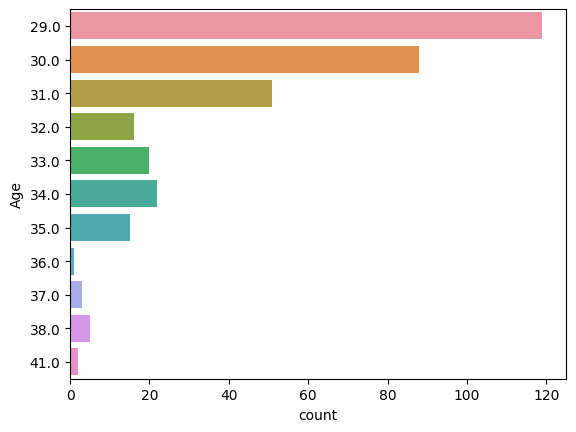

In [ ]:
sns.countplot(data=atipicos_edad, y='Age')

In [ ]:
atipicos_peso = find_outliers_IQR(df_M_Gym_1, "Weight")
atipicos_peso

ID                             Name Sex   Age  Height  ...  \
4370      2490  Liliyana Lyubenova Aleksandrova   F  21.0   167.0  ...   
4371      2490  Liliyana Lyubenova Aleksandrova   F  21.0   167.0  ...   
4372      2490  Liliyana Lyubenova Aleksandrova   F  21.0   167.0  ...   
4373      2490  Liliyana Lyubenova Aleksandrova   F  21.0   167.0  ...   
4374      2490  Liliyana Lyubenova Aleksandrova   F  21.0   167.0  ...   
...        ...                              ...  ..   ...     ...  ...   
264539  132383                    Kana Yamawaki   F  16.0   141.0  ...   
264540  132383                    Kana Yamawaki   F  16.0   141.0  ...   
264541  132383                    Kana Yamawaki   F  16.0   141.0  ...   
264542  132383                    Kana Yamawaki   F  16.0   141.0  ...   
264543  132383                    Kana Yamawaki   F  16.0   141.0  ...   

        Season    City       Sport                                     Event  \
4370    Summer   Tokyo  Gymnastics  Gymnastics Women's Individual All-Around   
4371    Summer   Tokyo  Gymnastics         Gymnastics Women's Floor Exercise   
4372    Summer   Tokyo  Gymnastics            Gymnastics Women's Horse Vault   
4373    Summer   Tokyo  Gymnastics            Gymnastics Women's Uneven Bars   
4374    Summer   Tokyo  Gymnastics           Gymnastics Women's Balance Beam   
...        ...     ...         ...                                       ...   
264539  Summer  Sydney  Gymnastics  Gymnastics Women's Individual All-Around   
264540  Summer  Sydney  Gymnastics         Gymnastics Women's Floor Exercise   
264541  Summer  Sydney  Gymnastics            Gymnastics Women's Horse Vault   
264542  Summer  Sydney  Gymnastics            Gymnastics Women's Uneven Bars   
264543  Summer  Sydney  Gymnastics           Gymnastics Women's Balance Beam   

              Medal  
4370    sin medalla  
4371    sin medalla  
4372    sin medalla  
4373    sin medalla  
4374    sin medalla  
...             ...  
264539  sin medalla  
264540  sin medalla  
264541  sin medalla  
264542  sin medalla  
264543  sin medalla  

[62 rows x 15 columns]

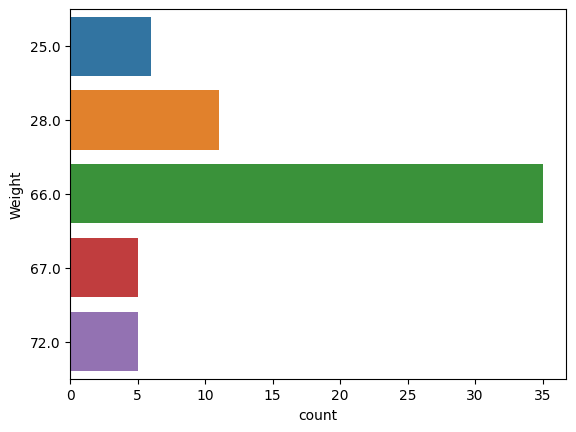

In [ ]:
sns.countplot(data=atipicos_peso, y='Weight')

In [ ]:
atipicos_altura = find_outliers_IQR(df_M_Gym_1, "Height")
atipicos_altura

ID             Name Sex   Age  Height  ...  Season         City  \
29333    15150  Rosario Briones   F  15.0   127.0  ...  Summer  Mexico City   
29334    15150  Rosario Briones   F  15.0   127.0  ...  Summer  Mexico City   
29335    15150  Rosario Briones   F  15.0   127.0  ...  Summer  Mexico City   
29336    15150  Rosario Briones   F  15.0   127.0  ...  Summer  Mexico City   
29337    15150  Rosario Briones   F  15.0   127.0  ...  Summer  Mexico City   
...        ...              ...  ..   ...     ...  ...     ...          ...   
244745  122536   Mirela ugurlan   F  15.0   137.0  ...  Summer      Atlanta   
244746  122536   Mirela ugurlan   F  15.0   137.0  ...  Summer      Atlanta   
244747  122536   Mirela ugurlan   F  15.0   137.0  ...  Summer      Atlanta   
244748  122536   Mirela ugurlan   F  15.0   137.0  ...  Summer      Atlanta   
244749  122536   Mirela ugurlan   F  15.0   137.0  ...  Summer      Atlanta   

             Sport                                     Event        Medal  
29333   Gymnastics  Gymnastics Women's Individual All-Around  sin medalla  
29334   Gymnastics        Gymnastics Women's Team All-Around  sin medalla  
29335   Gymnastics         Gymnastics Women's Floor Exercise  sin medalla  
29336   Gymnastics            Gymnastics Women's Horse Vault  sin medalla  
29337   Gymnastics            Gymnastics Women's Uneven Bars  sin medalla  
...            ...                                       ...          ...  
244745  Gymnastics        Gymnastics Women's Team All-Around       Bronze  
244746  Gymnastics         Gymnastics Women's Floor Exercise  sin medalla  
244747  Gymnastics            Gymnastics Women's Horse Vault  sin medalla  
244748  Gymnastics            Gymnastics Women's Uneven Bars  sin medalla  
244749  Gymnastics           Gymnastics Women's Balance Beam  sin medalla  

[136 rows x 15 columns]

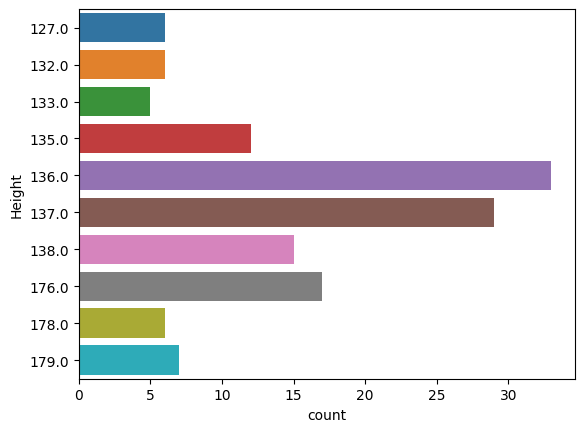

In [ ]:
sns.countplot(data=atipicos_altura, y='Height')

🔎 **ANÁLSIS UNIVARIADO, BIVARIADO Y MULTIVARIADO** 

In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip (22.0 MB)


In [ ]:
import pandas_profiling 

In [ ]:
profile = pandas_profiling.ProfileReport(df_M_Gym_1)
profile

Output hidden; open in https://colab.research.google.com to view.

🔔 **Viendo la matriz de correlación "phi" parece haber una relación entre  Medallas - NOC y Medallas - Team. Pero dado que en Medallas se suman los registros "sin medalla" es decir que participaron pero sin consecución de presea, esta relación muestra mas bien el nivel de participación de estos NOC - Team, evidencia ésta que es real dado que históricamente, países como EEUU, China, y Rusia están a la vanguardia en esta disciplina. Se desdoblará el análisis considerando cada color de medalla.**

🥇

In [ ]:
df_M_Gym_Med=df_M_Gym_1[df_M_Gym_1.Medal != "sin medalla" ] # dataframe para atletas mujeres gimnastas qque han obtenido medalla olímpica

In [ ]:
df_M_Gym_Med

ID                            Name Sex   Age  Height  ...  Season  \
677        394                      Irene Abel   F  19.0   160.0  ...  Summer   
1089       610             Ginko Abukawa-Chiba   F  26.0   148.0  ...  Summer   
1121       627        Andreea Roxana Acatrinei   F  16.0   150.0  ...  Summer   
1942      1071  Kseniya Dmitriyevna Afanasyeva   F  20.0   158.0  ...  Summer   
2005      1109        Lavinia Agache (-Carney)   F  16.0   148.0  ...  Summer   
...        ...                             ...  ..   ...     ...  ...     ...   
270696  135379          Erika Zuchold (Barth-)   F  21.0   158.0  ...  Summer   
270698  135379          Erika Zuchold (Barth-)   F  21.0   158.0  ...  Summer   
270702  135379          Erika Zuchold (Barth-)   F  25.0   158.0  ...  Summer   
270704  135379          Erika Zuchold (Barth-)   F  25.0   158.0  ...  Summer   
270705  135379          Erika Zuchold (Barth-)   F  25.0   158.0  ...  Summer   

               City       Sport                               Event   Medal  
677          Munich  Gymnastics  Gymnastics Women's Team All-Around  Silver  
1089          Tokyo  Gymnastics  Gymnastics Women's Team All-Around  Bronze  
1121        Beijing  Gymnastics  Gymnastics Women's Team All-Around  Bronze  
1942         London  Gymnastics  Gymnastics Women's Team All-Around  Silver  
2005    Los Angeles  Gymnastics  Gymnastics Women's Team All-Around    Gold  
...             ...         ...                                 ...     ...  
270696  Mexico City  Gymnastics  Gymnastics Women's Team All-Around  Bronze  
270698  Mexico City  Gymnastics      Gymnastics Women's Horse Vault  Silver  
270702       Munich  Gymnastics  Gymnastics Women's Team All-Around  Silver  
270704       Munich  Gymnastics      Gymnastics Women's Horse Vault  Silver  
270705       Munich  Gymnastics      Gymnastics Women's Uneven Bars  Silver  

[701 rows x 15 columns]

In [ ]:
profile = pandas_profiling.ProfileReport(df_M_Gym_Med)
profile

Output hidden; open in https://colab.research.google.com to view.

🔔 **Observando la matriz "phi" parece haber una correlación entre NOC - Medallas y Team - Medallas**

**No se visualiza una correlación entre la consecución de medallas de cualquier color y la edad, peso y altura de las gimnastas**

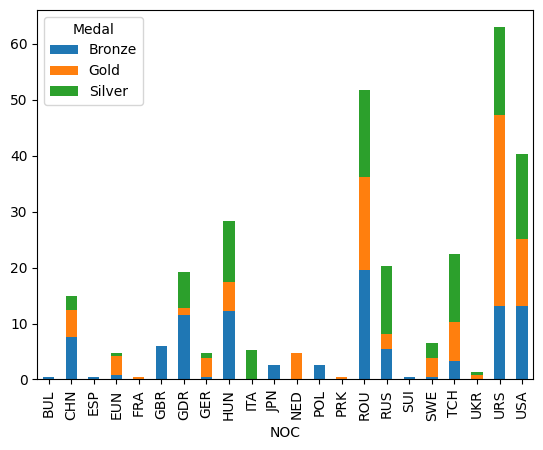

In [ ]:
plot = pd.crosstab(index=df_M_Gym_Med['NOC'],
            columns=df_M_Gym_Med['Medal']
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True)

🔔 **Se visualiza que Ex Unión Soviética, Rumania, Estados Unidos, Rusia, Alemania y China, elideran los medallero en esta disiplina.**

🔼 A continación se analizan las distribuciones de medallas según la Edad, Altura y Peso de las gimnastas, que si bien no se ha evienciado correlación entre estas y las medallas, son los factores que se continuarán analizando.

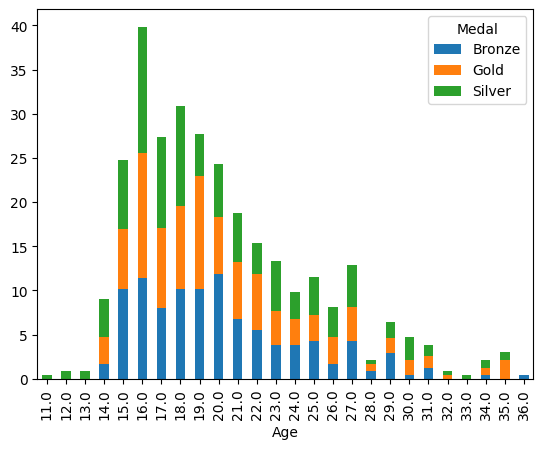

In [ ]:
plot = pd.crosstab(index=df_M_Gym_Med['Age'],
            columns=df_M_Gym_Med['Medal']
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True)

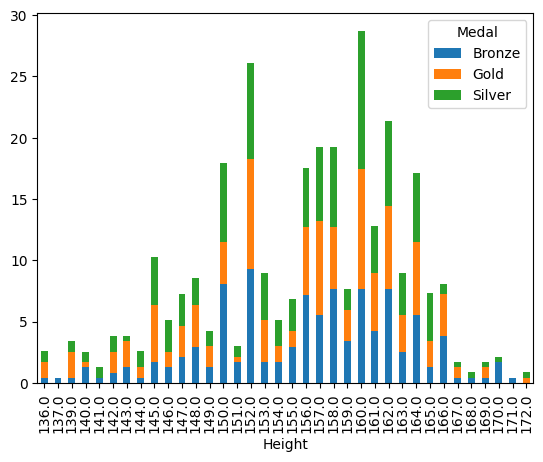

In [ ]:
plot = pd.crosstab(index=df_M_Gym_Med['Height'],
            columns=df_M_Gym_Med['Medal']
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True)

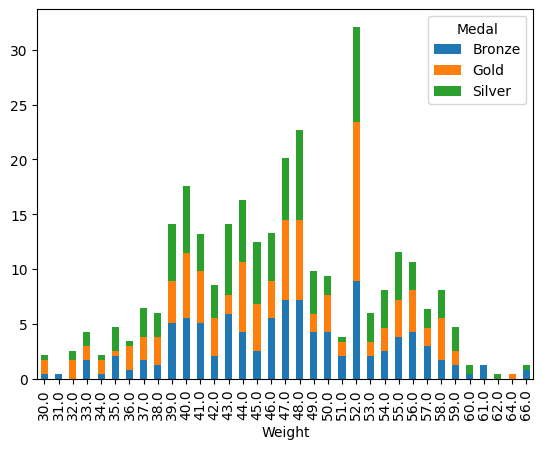

In [ ]:
plot = pd.crosstab(index=df_M_Gym_Med['Weight'],
            columns=df_M_Gym_Med['Medal']
                  ).apply(lambda r: r/r.sum() *100,
                          axis=0).plot(kind='bar', stacked=True)

🔔 **Se visualiza que Ex Unión Soviética, Rumania, Estados Unidos, Rusia, Alemania y China, elideran los medallero en esta disiplina.**

**CONCLUSIONES: Dado que la hipótesis inicial se basa en que la consecución de medallas depende o podría depender de ciertas condiciones particulares de las atletas, para el caso de la Gimnasia Artísitica parece tener mayor relevancia el país o equipo al que pertenece la gimnasta, quizás por la promoción y apoyo que le dan a estas estas actividades.**

**Se continuará el análisis de otras disciplinas.**


*Claudia Beatriz Perez Lorenzo*

*20/10/2022*